# Balance Data:

## - Check if the data is balanced:

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Preprocessed_dataset.csv')

# Count values in the Exam_Score column
exam_score_counts = data['Exam_Score'].value_counts()

# Calculate total and percentages
total_scores = exam_score_counts.sum()
exam_score_percentages = (exam_score_counts / total_scores) * 100

# Display the results
print("Number of High scores:", exam_score_counts['High'])
print("Number of Mid scores:", exam_score_counts['Mid'])
print("Number of Low scores:", exam_score_counts['Low'])
print("___")
print("Percentage of High scores: {:.2f}%".format(exam_score_percentages['High']))
print("Percentage of Mid scores: {:.2f}%".format(exam_score_percentages['Mid']))
print("Percentage of Low scores: {:.2f}%".format(exam_score_percentages['Low']))


Number of High scores: 1961
Number of Mid scores: 1373
Number of Low scores: 2720
___
Percentage of High scores: 32.39%
Percentage of Mid scores: 22.68%
Percentage of Low scores: 44.93%


We started by looking at the distribution of the Exam_Score categories (High, Mid, Low) and found that the percentages are imbalanced, not within the 40% to 60% range.

## - Process of correcting data balancing:

In [ ]:
import pandas as pd
from sklearn.utils import resample

# Load the dataset
data = pd.read_csv('Preprocessed_dataset.csv')

# Check the class distribution in the 'Exam_Score' column
num_high = data[data['Exam_Score'] == 'High'].shape[0]
num_mid = data[data['Exam_Score'] == 'Mid'].shape[0]
num_low = data[data['Exam_Score'] == 'Low'].shape[0]

# Define the majority class (Low) and two minority classes (High and Mid)
low_data = data[data['Exam_Score'] == 'Low']
high_data = data[data['Exam_Score'] == 'High']
mid_data = data[data['Exam_Score'] == 'Mid']

# Downsample the majority class (Low) to balance with High and Mid
undersampled_low = resample(low_data, replace=False, n_samples=min(num_high, num_mid), random_state=42)

# Combine the balanced data
final_data = pd.concat([undersampled_low, high_data, mid_data])

# Save the balanced dataset
final_data.to_csv('AfterBalance.csv', index=False)

# Display final class counts
print("Final number of High scores:", len(final_data[final_data['Exam_Score'] == 'High']))
print("Final number of Mid scores:", len(final_data[final_data['Exam_Score'] == 'Mid']))
print("Final number of Low scores:", len(final_data[final_data['Exam_Score'] == 'Low']))


Final number of High scores: 1961
Final number of Mid scores: 1373
Final number of Low scores: 1373


The code above uses the resample function to reduce the number of samples in the largest group (Low) so that it matches the other groups (High and Mid) in the Exam_Score column. This helps prevent the model from favoring the largest group, making it better at handling all three groups equally.

## - Data after the balancing process:

In [ ]:
import pandas as pd

# Load the balanced dataset
data = pd.read_csv('AfterBalance.csv')

# Count values in the Exam_Score column for each class
exam_score_values = data['Exam_Score']

# Calculate the number and percentage of each class
num_high = exam_score_values[exam_score_values == 'High'].count()
num_mid = exam_score_values[exam_score_values == 'Mid'].count()
num_low = exam_score_values[exam_score_values == 'Low'].count()

total = num_high + num_mid + num_low

percentage_high = (num_high / total) * 100
percentage_mid = (num_mid / total) * 100
percentage_low = (num_low / total) * 100

# Display the results
print("Percentage of High scores: {:.2f}%".format(percentage_high))
print("Percentage of Mid scores: {:.2f}%".format(percentage_mid))
print("Percentage of Low scores: {:.2f}%".format(percentage_low))


Percentage of High scores: 41.66%
Percentage of Mid scores: 29.17%
Percentage of Low scores: 29.17%


After calculating the percentages for each Exam_Score class, we confirmed that the data is more balanced. The High scores represent 41.66% of the data, while Mid and Low scores each represent 29.17%. This balanced distribution helps prevent the model from favoring any single category, ensuring fairer and more accurate predictions across all classes.

#Classification


 Classification is a supervised learning task, also structures data into distinct groups based on shared characteristics, streamlining analysis for greater speed and accuracy. It facilitates informed, data-driven decision-making, enhances the performance of machine learning models (such as detecting spam emails), and strengthens security by distinguishing between safe and potentially unsafe content where the goal is to predict the Exam_Score (low-high-Medium) based on the train data



# Gini index with 30% for testing and 70% for training

Gini Index in Decision Trees :In decision tree learning, the goal is to split the data at each node in a way that minimizes the Gini impurity, i.e., we want to split the dataset in such a way that each child node is more homogeneous than the parent node.

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Feature Selection:
Feature selection is the process of identifying and selecting the most relevant features (independent variables) for the model. For classification, we will use all the features except for the target variable (Exam_Score).



In [ ]:
df=pd.read_csv('AfterBalance.csv')
# feature selection
fn=df.keys().tolist()[:-1]
x=df[fn]
y=df['Exam_Score']


To evaluate the performance of the classifier, we need to divide the dataset into a training set (used to train the model) and a test set (used to evaluate the model's performance on unseen data)
 here we chose  30% of the data  for testing, while 70% is used for training.


In [ ]:
# splitting data
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:

clf=DecisionTreeClassifier()
clf=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)


# confusion matrix:

[[433  21 132]
 [ 11 306  91]
 [134  79 206]]


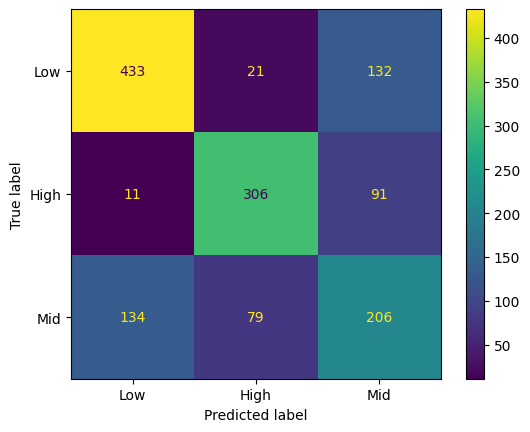

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_pred)
print(cm)
cn=df['Exam_Score'].unique()
disp=ConfusionMatrixDisplay.from_estimator(clf,x_test,y_test,display_labels=cn)


The confusion matrix illustrates the performance of a classification model across three categories: Low, Mid, and High. Each row corresponds to the actual class, and each column represents the predicted class. Here’s a breakdown of the classification results:

*  For the Low class: 433 instances were correctly classified as Low, while 21 were misclassified as High and 132 as Mid.
*  For the High class: 306 instances were correctly classified as High, while 11 were misclassified as Low and 91 as Mid.
*  For the Mid class: 206 instances were correctly classified as Mid, but 134 were misclassified as Low and 79 as High.



#  Decision Tree:

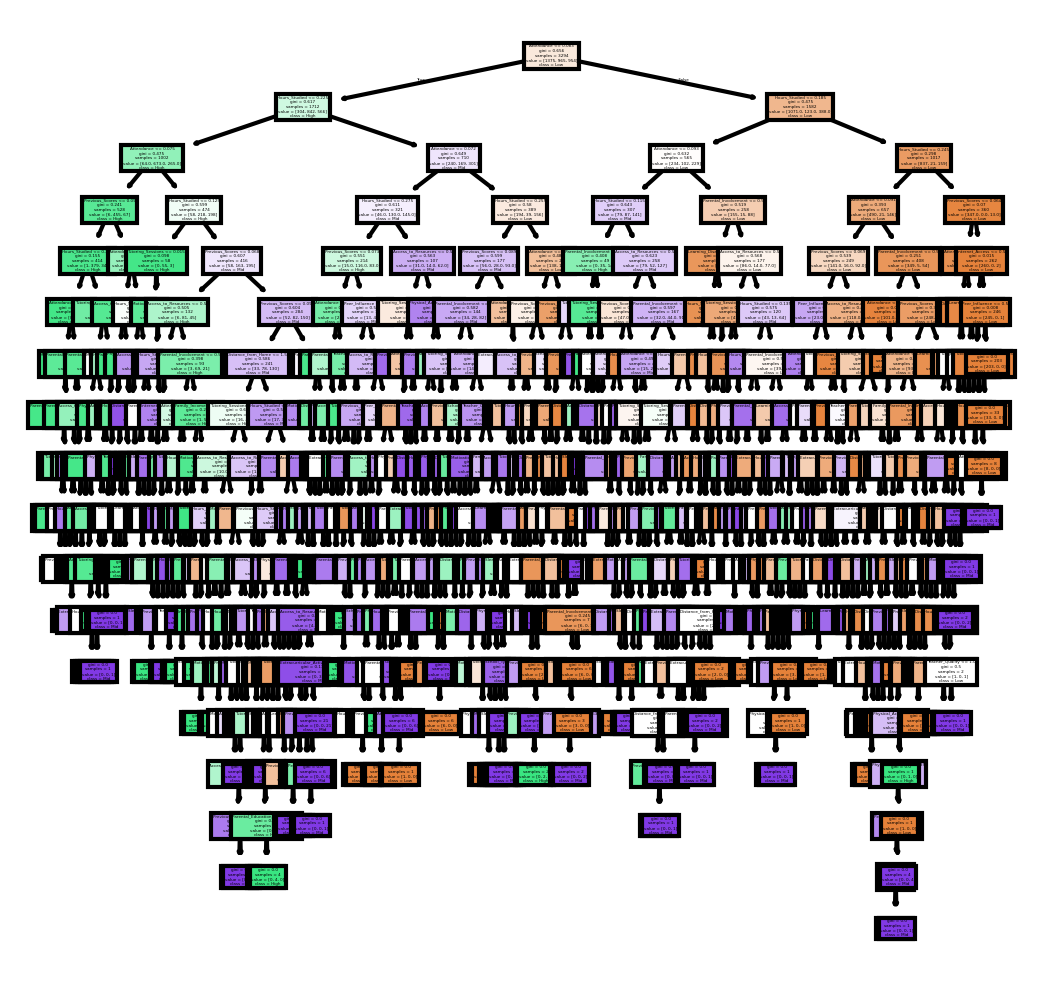

In [ ]:
from sklearn import tree
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(clf,feature_names=fn,class_names=cn,filled=True);

In this decision tree, the model starts with Attendance as the root node, where samples are split based on their attendance values. This selection is determined by the Gini impurity, choosing features that most effectively separate Exam_Score classes.

After splitting on Attendance, the tree moves to features like Hours_Studied and Previous_Scores, which further divide samples. This pattern continues, with each feature refining the classification as the tree progresses.

## Completing in model evaluation and selection:

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[442  27 117]
 [ 11 305  92]
 [133  91 195]]
Accuracy: 0.6666666666666666
Error Rate: 0.33333333333333337
Sensitivity: 0.9651898734177216
Specificity: 0.9424307036247335
Precision: 0.9186746987951807




* **Accuracy**: Measures the proportion of correct predictions out of all predictions. Here, the model has an accuracy of about 67%, meaning it correctly classifies approximately two-thirds of the instances.
* **Error Rate**: Represents the percentage of incorrect predictions. In this case, the error rate is approximately 33%.
* **Sensitivity (Recall)**: Indicates the proportion of true positives correctly identified. The sensitivity is about 96.5%, showing a strong ability to identify positive cases.
* **Specificity**: Measures the proportion of true negatives correctly identified. At around 94.2%, this indicates the model’s effectiveness in recognizing negative cases.
* **Precision**: Refers to the accuracy of positive predictions. Here, it’s about 91.9%, suggesting that most positive predictions are correct.

---

## Outcomes

* The model achieves a moderate overall accuracy, successfully predicting around 67% of instances.
* The high sensitivity (96.5%) shows that the model is effective at identifying positive cases.
* The specificity is also strong at 94.2%, highlighting its proficiency in recognizing negative cases.
* Precision, at approximately 91.9%, reflects a high degree of confidence in the model’s positive predictions.



# Gini index with 20% for testing and 80% for training

To evaluate the performance of the classifier, we need to divide the dataset into a training set (used to train the model) and a test set (used to evaluate the model's performance on unseen data) here we chose 20% of the data for testing, while 80% is used for training.

In [ ]:
# splitting data
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
clf=DecisionTreeClassifier()
clf=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)


## confusion matrix:

[[289  17  87]
 [ 14 192  61]
 [ 87  59 136]]


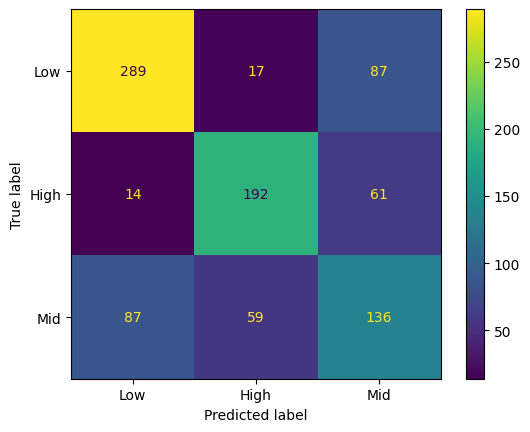

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_pred)
print(cm)
cn=df['Exam_Score'].unique()
disp=ConfusionMatrixDisplay.from_estimator(clf,x_test,y_test,display_labels=cn)


As shown used confusion matrix to summarizes the basic measures for performance evaluation This matrix is a 3x3 array where:

* Low category: 289 instances were accurately labeled as Low, but 17 were incorrectly predicted as High, and 87 as Mid.

* High category: 192 instances were correctly identified as High, with 14 mistakenly classified as Low, and 61 as Mid.

* Mid category: 136 instances were correctly assigned to Mid, though 87 were misclassified as Low, and 59 as High.



This matrix reveals the model’s classification effectiveness, showing strong performance in distinguishing between classes, with some misclassifications observed, particularly between the Mid and Low categories.

## Decision Tree:

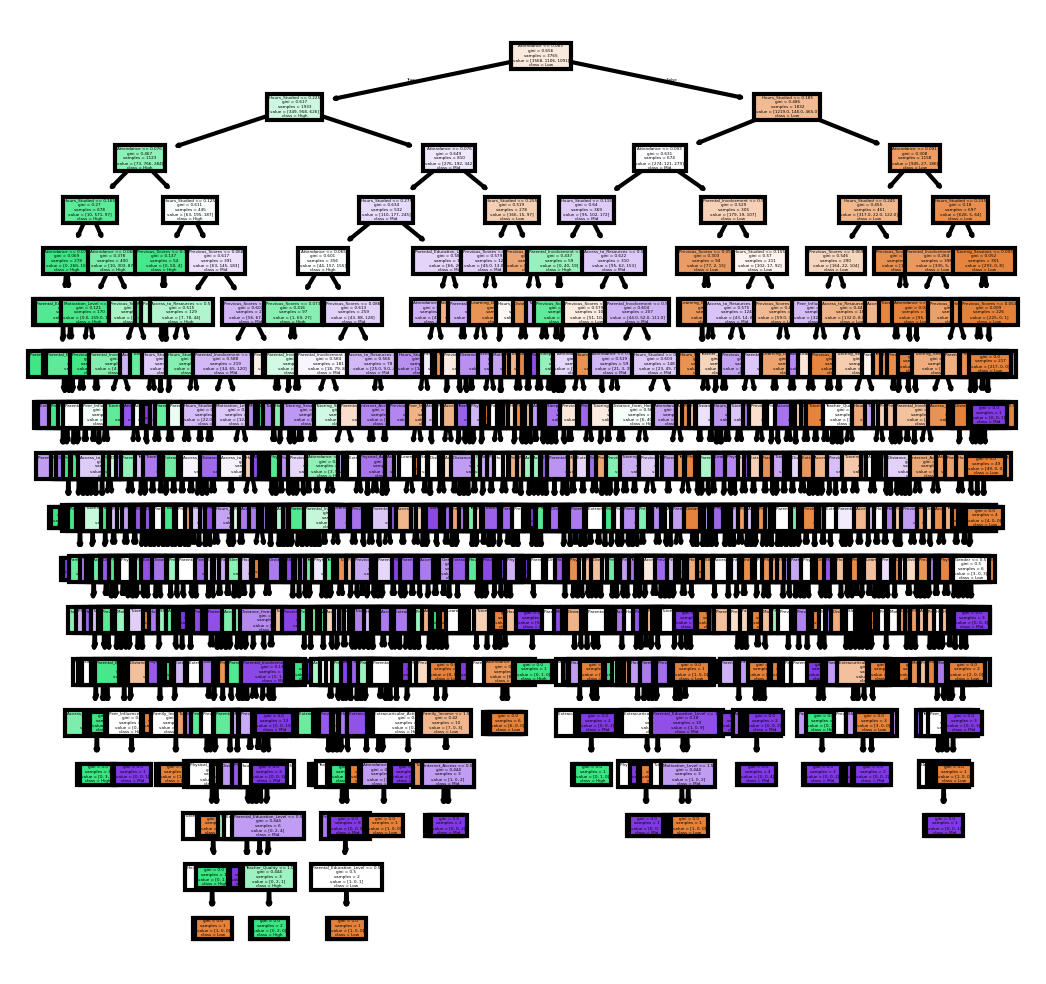

In [ ]:
from sklearn import tree
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(clf,feature_names=fn,class_names=cn,filled=True);


In this decision tree, the splitting process begins with the feature Attendance as the root node, where samples are initially divided based on their values for Attendance. The feature selection at each node is based on its ability to separate the Exam_Score classes effectively.

After the split on Attendance, the tree proceeds to evaluate other features, such as Hours_Studied and Parental_Involvement, to further refine the data. This process of choosing features and splitting by their values continues at each level, creating more specific groups that help in classifying Exam_Score.

The tree reaches terminal nodes, or leaf nodes, which provide the final classification for Exam_Score as Low, Medium, or High.

## Completing in model evaluation and selection:

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute and print the confusion matrix
cm3 = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm3)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm3[1, 1]
TN = cm3[0, 0]
FP = cm3[0, 1]
FN = cm3[1, 0]


# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[289  17  87]
 [ 14 192  61]
 [ 87  59 136]]
Accuracy: 0.6549893842887473
Error Rate: 0.3450106157112527
Sensitivity: 0.9320388349514563
Specificity: 0.9444444444444444
Precision: 0.9186602870813397




- **Accuracy:** Reflects the overall correctness of the model, calculated as the ratio of correct predictions to the total number of predictions. In this case, the model's accuracy is approximately **65%**.

- **Error Rate:** Represents the proportion of incorrect predictions, calculated as `1 - Accuracy`. Here, the error rate is around **35%**.

- **Sensitivity (True Positive Rate):** Measures the proportion of actual positive cases correctly identified by the model. In this case, it's approximately **93%**.

- **Specificity (True Negative Rate):** Reflects the model’s ability to correctly identify negative cases. It's around **94%** in this scenario.

- **Precision (Positive Predictive Value):** The proportion of correctly predicted positive cases among all cases predicted as positive. Here, it stands at about **92%**.
----
## Outcomes

- **Accuracy:** The model's accuracy is moderate, suggesting that it correctly predicts the class label for about 65% of the cases.

- **Sensitivity:** The model has a high sensitivity, which indicates its strong capability in correctly identifying positive cases.

- **Specificity:** A high specificity score reflects the model's effectiveness in recognizing negative cases.

- **Precision:** The precision rate is also high, showing that the model is reliable in terms of the correctness of its positive predictions.


# Gini index with 40% for testing and 60% for training

To evaluate the performance of the classifier, we need to divide the dataset into a training set (used to train the model) and a test set (used to evaluate the model's performance on unseen data) here we chose 40% of the data for testing, while 60% is used for training.

In [ ]:
# splitting data
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.4,random_state=1)

In [ ]:
clf=DecisionTreeClassifier()
clf=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

## confusion matrix:

[[580  28 166]
 [ 35 403 120]
 [178 114 259]]


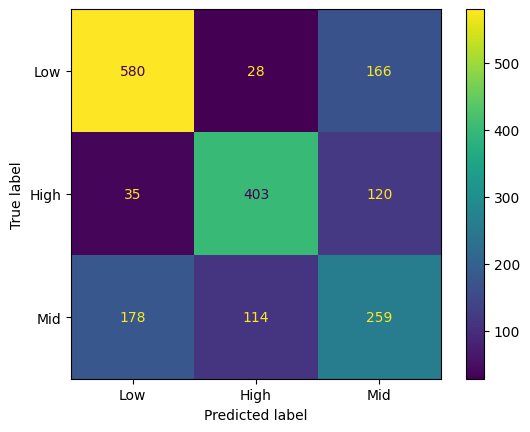

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_pred)
print(cm)
cn=df['Exam_Score'].unique()
disp=ConfusionMatrixDisplay.from_estimator(clf,x_test,y_test,display_labels=cn)

The confusion matrix represents the performance evaluation of the classification model. In this case, we have a 3x3 confusion matrix where each row represents the actual classification, and each column represents the predicted classification. From the results, it appears:

* Low category: 580 instances were correctly classified as Low, while 28 were incorrectly predicted as High, and 166 as Mid.

* High category: 403 instances were accurately identified as High, with 35 mistakenly classified as Low, and 120 as Mid.

* Mid category: 259 instances were correctly assigned to Mid, but 178 were misclassified as Low, and 114 as High.



## Decision Tree:

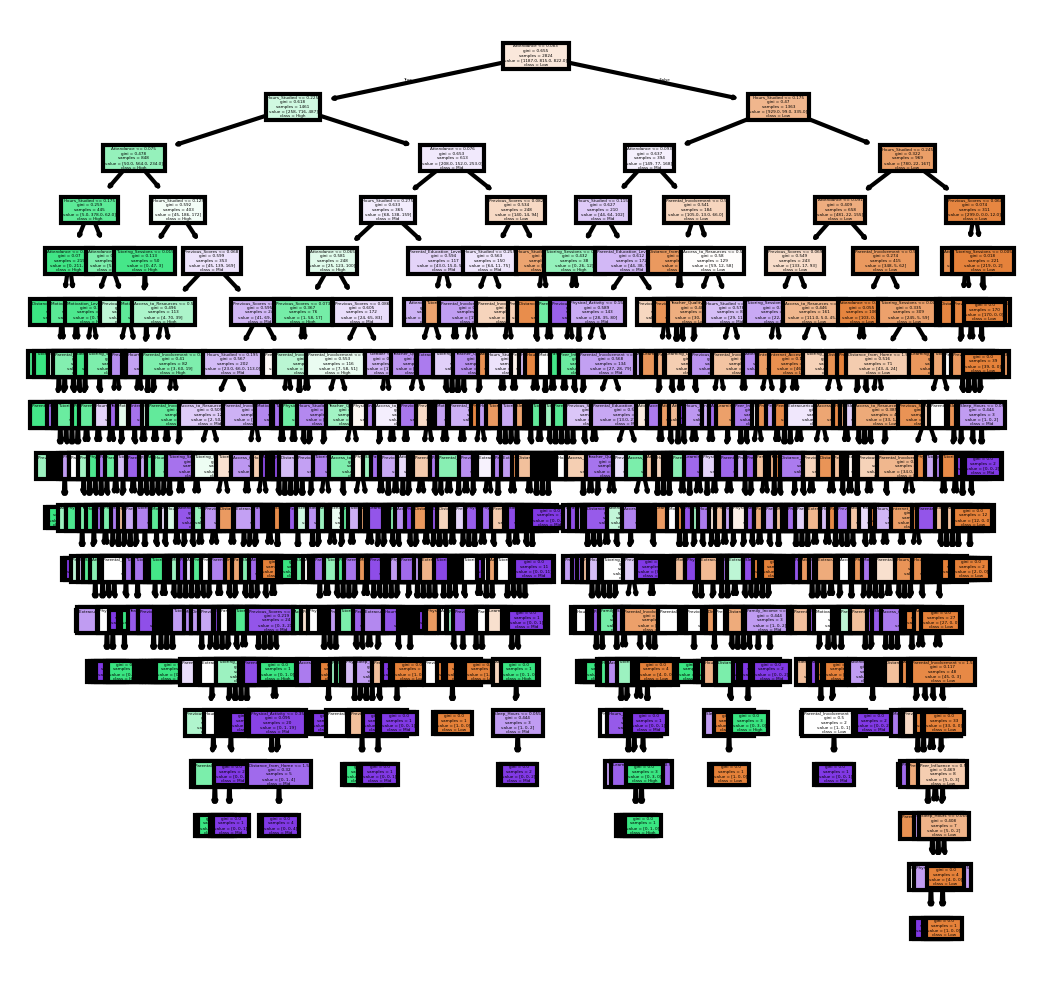

In [ ]:
from sklearn import tree
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(clf,feature_names=fn,class_names=cn,filled=True);

The decision tree model for predicting Exam_Score begins with Attendance as the initial split, where lower attendance often indicates a lower Exam_Score. It then uses features like Hours_Studied and Previous_Scores to refine predictions, with higher values generally leading to better scores.

At each leaf node, the model provides a final classification (Low, Medium, or High), capturing key factors like study habits and attendance to predict student performance accurately.

## Completing in model evaluation and selection:

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute and print the confusion matrix
cm3 = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm3)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm3[1, 1]
TN = cm3[0, 0]
FP = cm3[0, 1]
FN = cm3[1, 0]


# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[580  28 166]
 [ 35 403 120]
 [178 114 259]]
Accuracy: 0.6595857673924589
Error Rate: 0.3404142326075411
Sensitivity: 0.9200913242009132
Specificity: 0.9539473684210527
Precision: 0.9350348027842227





- **Accuracy:**   Represents the overall correctness of the model, calculated as the ratio of correct predictions to the total number of predictions. In this case, the model’s accuracy is approximately **66%**.

- **Error Rate:**  represents the proportion of wrong predictions out of all predictions.Here, the error rate is around **34%**.

- **Sensitivity (True Positive Rate):**  measures the proportion of actual positives that are correctly.In this case, it's approximately **92%**.

- **Specificity (True Negative Rate):**  measures the proportion of actual negatives that are correctly.Here, it's about  **95%**.

- **Precision (Positive Predictive Value):** the proportion of positive identifications that were actually correct.It's around **93%** in this scenario. .

---

## Outcomes

- **Accuracy:**  
  The model demonstrates moderate accuracy, meaning it correctly classifies about 66% of the cases.

- **Sensitivity:**  
  The high sensitivity score indicates the model’s strong ability to correctly detect positive cases.

- **Specificity:**  
  A high specificity score reflects the model’s effectiveness in correctly identifying negative cases.

- **Precision:**  
  The precision rate is also high, indicating reliable positive predictions by the model.



## Evaluate the models of Gini Index:


|           | 70% Train, 30% Test | 80% Train, 20% Test | 60% Train, 40% Test |
|-----------------|----------------------|----------------------|----------------------|
| **Accuracy**    | 0.6667               | 0.6550              | 0.6596              |
| **Error Rate**  | 0.3333               | 0.3450              | 0.3404              |
| **Sensitivity** | 0.9652               | 0.9320              | 0.9201              |
| **Specificity** | 0.9424               | 0.9444              | 0.9539              |
| **Precision**   | 0.9187               | 0.9187              | 0.9350              |


- Accuracy: Across all splits, the accuracy hovers around 65-67%, indicating moderate overall performance. The 70-30 split provides the highest accuracy (66.67%).

- Error Rate: The error rate is inversely related to accuracy, with values close to 33-35% for each split, reflecting that about a third of predictions are incorrect. The 70-30 split has the lowest error rate, consistent with its higher accuracy.

- Sensitivity:
 - Sensitivity is highest with the 70-30 split (96.52%), meaning this split is most effective at identifying true positives.

 - The 80-20 and 60-40 splits have slightly lower sensitivity, but all values indicate good performance in identifying positives
 .
- Specificity:

 - Specificity is highest with the 60-40 split (95.39%), suggesting this split is most effective at correctly identifying true negatives.

 - All splits show strong specificity, indicating reliable identification of negatives across the board.
- Precision:

 - Precision is slightly higher with the 60-40 split (93.50%), indicating that, with this split, when the model predicts a positive, it’s correct more often than in the other splits.

 - Precision remains high across all splits, showing that positive predictions are generally accurate.
### Summary
- The 70-30 split shows the highest accuracy and sensitivity, making it preferable if correctly identifying positives is crucial.

- The 60-40 split offers the highest specificity and precision, which is beneficial if correctly identifying negatives or making accurate positive predictions is more important.

- The 80-20 split balances sensitivity and specificity but shows the lowest accuracy.

Based on these results, the 70-30 split might be the best choice for a balanced approach, with high accuracy and sensitivity. If the focus is on precision and specificity, the 60-40 split could be more suitable.

# Entropy

 Entropy measures the uncertainty or disorder in data. It helps decide the best way to split data, aiming to reduce uncertainty and improve classification accuracy.








# Entropy with 30% for testing and 70% for training



The data is split into 70% for training and 30% for testing. A decision tree model is trained using entropy for splitting, and then predictions are made on the test data to assess the model's performance.


In [ ]:
# splitting data
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
clf=DecisionTreeClassifier(criterion="entropy")
clf=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)


it will help in evaluating the model's classification performance by providing a detailed breakdown of how well it predicts each category. The confusion matrix shows the number of correct and incorrect predictions for each class, helping to identify areas where the model may be misclassifying data. It aids in understanding the model's strengths and weaknesses in distinguishing between classes.

## confusion matrix:

[[431  20 135]
 [ 18 300  90]
 [122  86 211]]


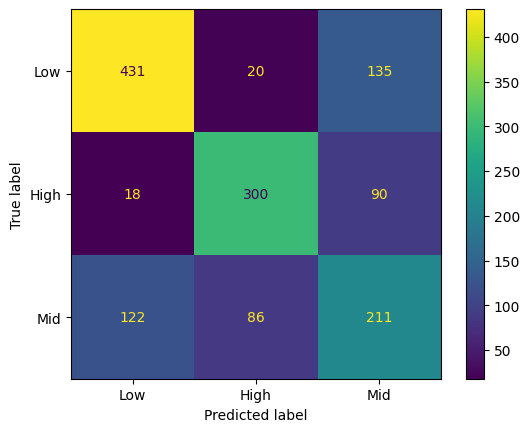

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_pred)
print(cm)
cn=df['Exam_Score'].unique()
disp=ConfusionMatrixDisplay.from_estimator(clf,x_test,y_test,display_labels=cn)


Based on this confusion matrix, we can make the following interpretations:
- Low category: 431 instances were correctly classified as Low, while 20 were incorrectly predicted as High, and 135 as Mid.

- High category: 300 instances were accurately identified as High, with 18 mistakenly classified as Low, and 90 as Mid.

- Mid category: 211 instances were correctly assigned to Mid, but 122 were misclassified as Low, and 86 as High.

## Decision Tree:

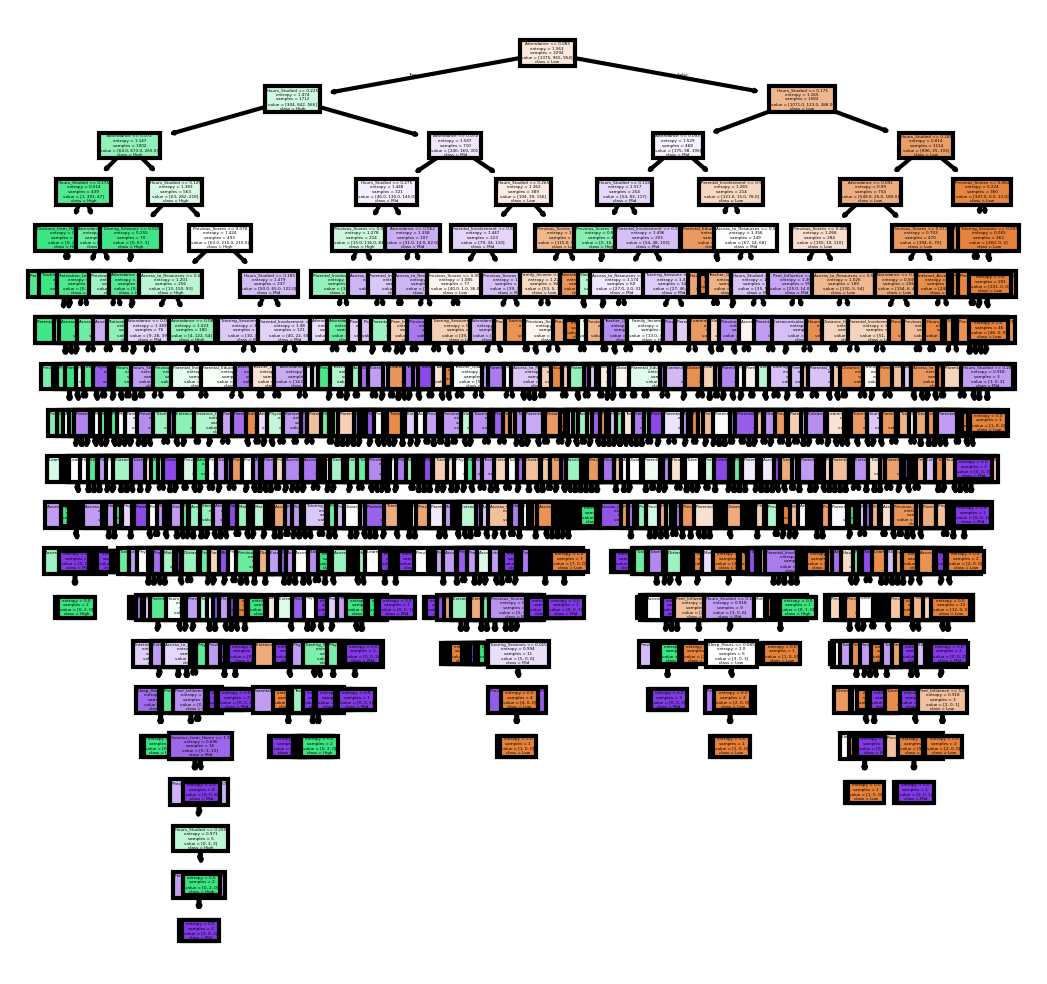

In [ ]:
from sklearn import tree
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(clf,feature_names=fn,class_names=cn,filled=True);


The decision tree begins with Attendance as the root node, splitting data based on attendance values due to its high entropy reduction. From there, additional features like Hours_Studied and Parental_Involvement further divide the samples, refining predictions.

Each branch leads to a leaf node, where final classifications are made for Exam_Score as Low, Medium, or High. This path-based structure captures different student profiles, with each feature combination leading to a predicted performance level.

## Completing in model evaluation and selection:

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute and print the confusion matrix
cm4 = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm4)


# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)


# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm4[1, 1]
TN = cm4[0, 0]
FP = cm4[0, 1]
FN = cm4[1, 0]


# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)


# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[431  20 135]
 [ 18 300  90]
 [122  86 211]]
Accuracy: 0.6666666666666666
Error Rate: 0.33333333333333337
Sensitivity: 0.9433962264150944
Specificity: 0.9556541019955654
Precision: 0.9375


- Accuracy: 66.67% – The model correctly classifies approximately 67% of cases overall.
- Error Rate: 33.33% – Roughly 33% of predictions are incorrect.
- Sensitivity (True Positive Rate): 94.34% – The model is highly effective at identifying actual positives.
- Specificity (True Negative Rate): 95.57% – High specificity indicates strong performance in correctly identifying negatives.

- Precision: 93.75% – Positive predictions are highly accurate.
---
##Outcomes
- Moderate Accuracy: The model has a reasonably good overall accuracy at 66.67%.
- High Sensitivity: The model effectively detects true positives with a sensitivity of 94.34%.
- High Specificity: Specificity of 95.57% shows strength in identifying negatives.

- High Precision: A precision of 93.75% indicates reliability in positive predictions.


# Entropy with 20% for testing and 80% for training


The data is split into 80% for training and 20% for testing. A decision tree model is trained using entropy for splitting, and then predictions are made on the test data to assess the model's performance.


In [ ]:
# splitting data
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
clf=DecisionTreeClassifier(criterion="entropy")
clf=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

## confusion matrix:

[[291  11  91]
 [  8 209  50]
 [ 76  69 137]]


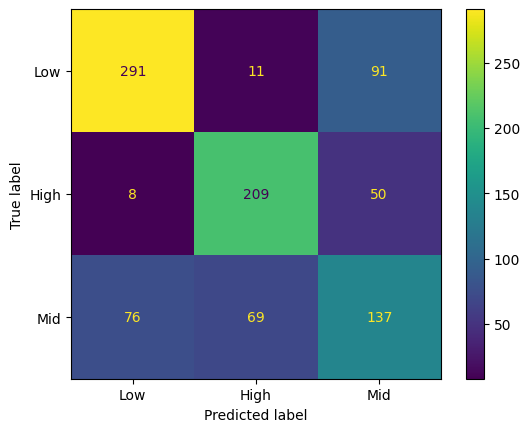

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_pred)
print(cm)
cn=df['Exam_Score'].unique()
disp=ConfusionMatrixDisplay.from_estimator(clf,x_test,y_test,display_labels=cn)


## Decision Tree:

The confusion matrix summarizes the performance evaluation across three categories:

- Low category: 291 instances were accurately labeled as Low, but 11 were incorrectly predicted as High, and 91 as Mid.
- High category: 209 instances were correctly identified as High, with 8 mistakenly classified as Low, and 50 as Mid.
- Mid category: 137 instances were correctly assigned to Mid, though 76 were misclassified as Low, and 69 as High.

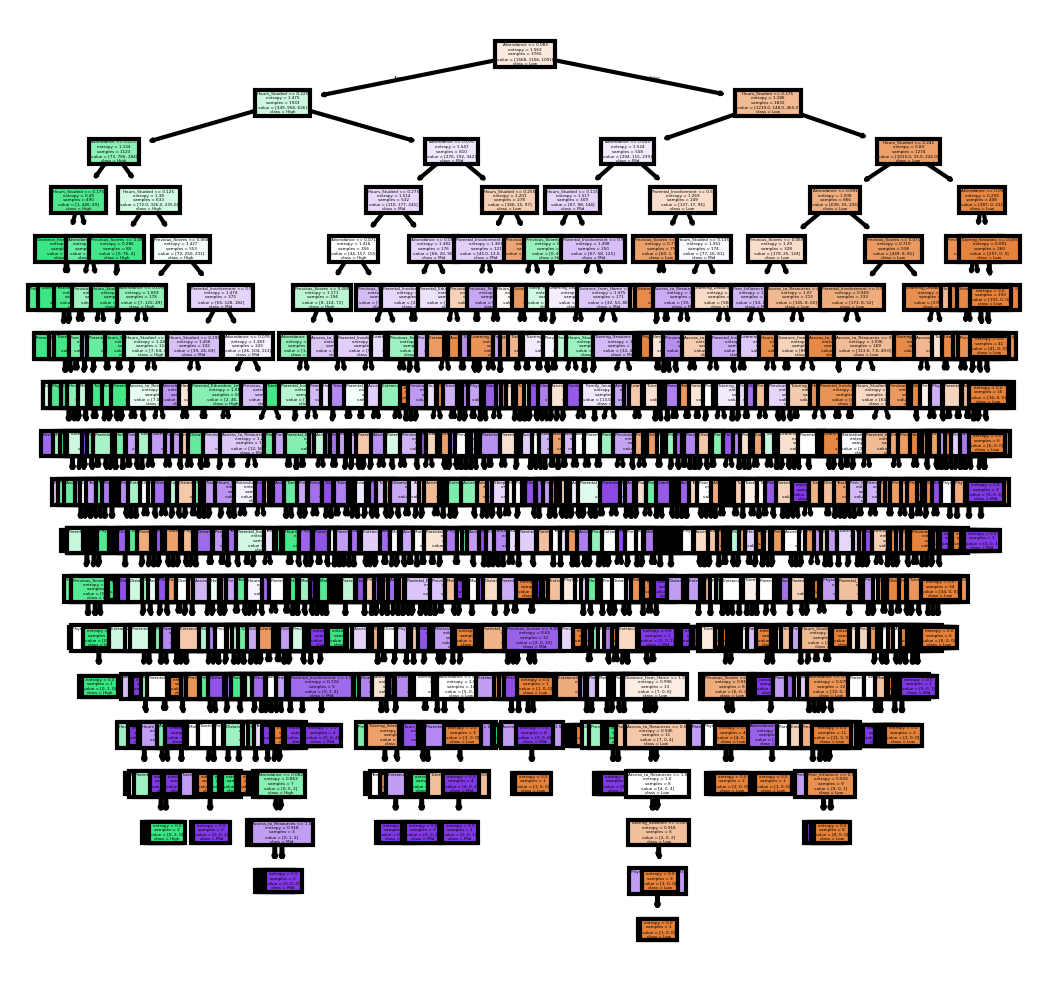

In [ ]:
from sklearn import tree
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(clf,feature_names=fn,class_names=cn,filled=True);

This decision tree uses Attendance at the root to first split the data, reflecting its importance in separating Exam_Score levels based on entropy.

Subsequent splits involve features like Hours_Studied and Parental_Involvement, further dividing samples into increasingly specific groups. At each terminal leaf node, the tree assigns a final Exam_Score classification—Low, Medium, or High—based on the values encountered along the decision path.

## Completing in model evaluation and selection:

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute and print the confusion matrix
cm3 = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm3)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm3[1, 1]
TN = cm3[0, 0]
FP = cm3[0, 1]
FN = cm3[1, 0]


# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[291  11  91]
 [  8 209  50]
 [ 76  69 137]]
Accuracy: 0.6762208067940552
Error Rate: 0.32377919320594484
Sensitivity: 0.9631336405529954
Specificity: 0.9635761589403974
Precision: 0.95


- Accuracy: 67.62% – The model correctly classifies approximately 68% of cases overall.
- Error Rate: 32.38% – About 32% of predictions are incorrect.
- Sensitivity (True Positive Rate): 96.31% – The model is highly effective at identifying actual positives.
- Specificity (True Negative Rate): 96.36% – High specificity indicates strong performance in correctly identifying negatives.
- Precision: 95% – Positive predictions are highly accurate.
---
##Outcomes
- Moderate Accuracy: The model demonstrates reasonably good overall accuracy at 67.62%.
- High Sensitivity: With a sensitivity of 96.31%, the model effectively detects true positives.
- High Specificity: A specificity of 96.36% shows strength in identifying negatives.
- High Precision: A precision of 95% reflects reliability in positive predictions.

# Entropy with 40% for testing and 60% for training


The data is split into 60% for training and 40% for testing. A decision tree model is trained using entropy for splitting, and then predictions are made on the test data to assess the model's performance.


In [ ]:
# splitting data
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.4,random_state=1)

In [ ]:
clf=DecisionTreeClassifier(criterion="entropy")
clf=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

## confusion matrix:

[[579  38 157]
 [ 25 394 139]
 [153 113 285]]


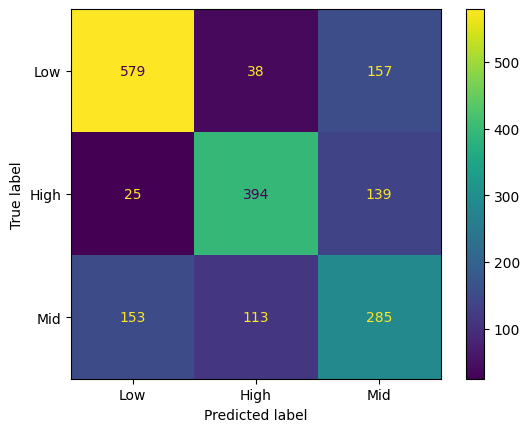

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_pred)
print(cm)
cn=df['Exam_Score'].unique()
disp=ConfusionMatrixDisplay.from_estimator(clf,x_test,y_test,display_labels=cn)

## Decision Tree:

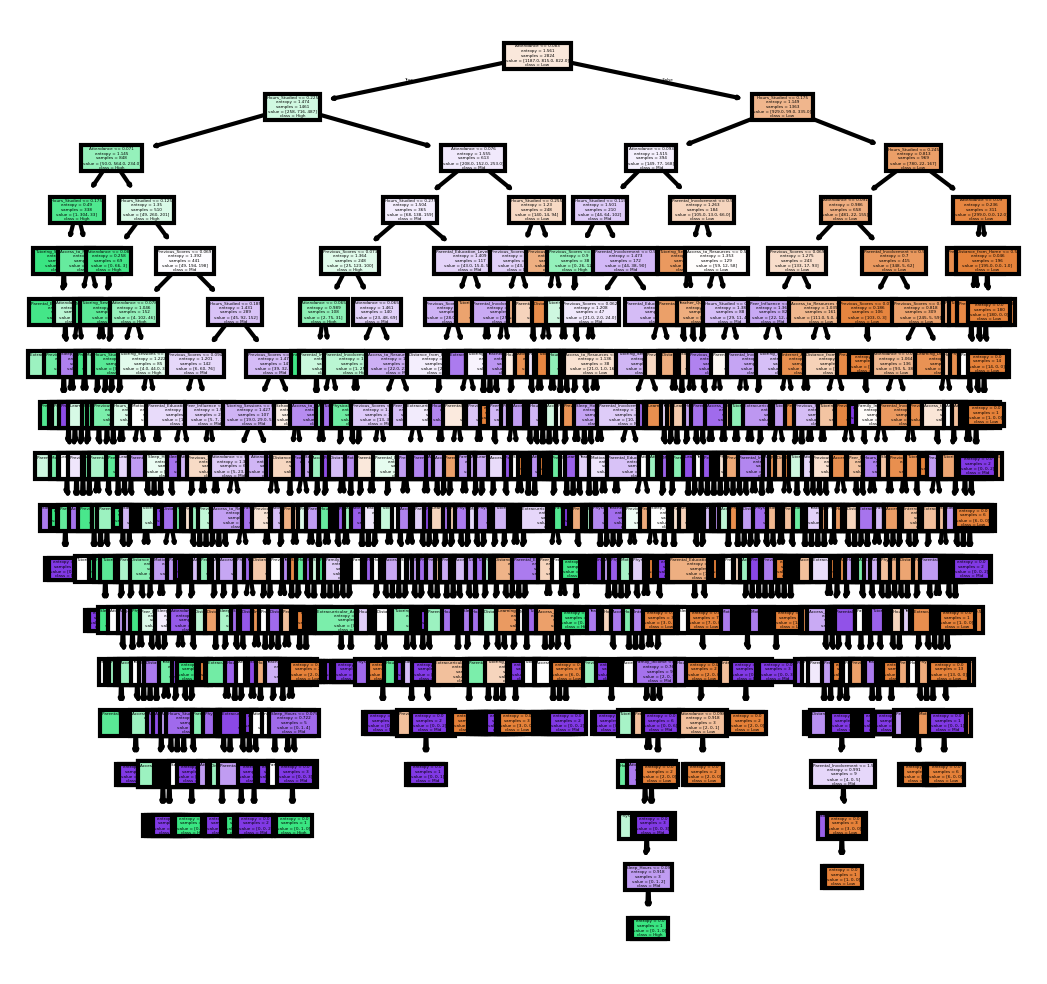

In [ ]:
from sklearn import tree
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(clf,feature_names=fn,class_names=cn,filled=True);

The confusion matrix shows the performance evaluation across three categories:

- Low category: 579 instances were accurately labeled as Low, while 38 were incorrectly predicted as High, and 157 as Mid.
- High category: 394 instances were correctly identified as High, with 25 mistakenly classified as Low, and 139 as Mid.
- Mid category: 285 instances were correctly assigned to Mid, though 153 were misclassified as Low, and 113 as High.

In this decision tree, the root node starts with Attendance, where samples are divided based on attendance values. This selection is guided by entropy, choosing features with the highest information gain at each split.

Following the split on Attendance, the tree considers other features, such as Hours_Studied and Parental_Involvement, to further segment the data. This process continues, with each feature refining the classifications at each level.

At the leaf nodes, the tree reaches its final classifications, assigning each sample an Exam_Score of Low, Medium, or High based on the path taken through the tree.

## Completing in model evaluation and selection:

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute and print the confusion matrix
cm3 = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm3)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm3[1, 1]
TN = cm3[0, 0]
FP = cm3[0, 1]
FN = cm3[1, 0]


# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[579  38 157]
 [ 25 394 139]
 [153 113 285]]
Accuracy: 0.6680828465215082
Error Rate: 0.3319171534784918
Sensitivity: 0.9403341288782816
Specificity: 0.9384116693679092
Precision: 0.9120370370370371


- Accuracy: 66.81% – Approximately two-thirds of the predictions made by the model are correct.
- Error Rate: 33.19% – About one-third of the predictions are incorrect.
- Sensitivity (True Positive Rate): 94.03% – The model performs well in identifying actual positive cases.
- Specificity (True Negative Rate): 93.84% – The model is also strong in correctly identifying negative cases.
- Precision: 91.20% – When the model predicts a positive outcome, it is correct 91.20% of the time.
## Outcomes
- Moderate Accuracy: The model shows an accuracy of 66.81%, reflecting a fair overall performance.
- High Sensitivity: With a sensitivity of 94.03%, the model is highly effective at identifying positives.
- Strong Specificity: The specificity of 93.84% demonstrates good capability in distinguishing negatives.
- Reliable Precision: Precision at 91.20% suggests dependable accuracy in positive predictions.

## Evaluate the models of Entropy:

<table style="width:100%; border-collapse: collapse;">
  <tr>
    <th style="border: 1px solid black; padding: 8px;"></th>
    <th style="border: 1px solid black; padding: 8px;">70% Train, 30% Test</th>
    <th style="border: 1px solid black; padding: 8px;">80% Train, 20% Test</th>
    <th style="border: 1px solid black; padding: 8px;">60% Train, 40% Test</th>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;"><strong>Accuracy</strong></td>
    <td style="border: 1px solid black; padding: 8px;">0.6667</td>
    <td style="border: 1px solid black; padding: 8px;"><strong>0.6762</strong></td>
    <td style="border: 1px solid black; padding: 8px;">0.6681</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;"><strong>Error Rate</strong></td>
    <td style="border: 1px solid black; padding: 8px;">0.3333</td>
    <td style="border: 1px solid black; padding: 8px;"><strong>0.3238</strong></td>
    <td style="border: 1px solid black; padding: 8px;">0.3319</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;"><strong>Sensitivity</strong></td>
    <td style="border: 1px solid black; padding: 8px;">0.9434</td>
    <td style="border: 1px solid black; padding: 8px;"><strong>0.9631</strong></td>
    <td style="border: 1px solid black; padding: 8px;">0.9403</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;"><strong>Specificity</strong></td>
    <td style="border: 1px solid black; padding: 8px;">0.9557</td>
    <td style="border: 1px solid black; padding: 8px;"><strong>0.9636</strong></td>
    <td style="border: 1px solid black; padding: 8px;">0.9384</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;"><strong>Precision</strong></td>
    <td style="border: 1px solid black; padding: 8px;">0.9375</td>
    <td style="border: 1px solid black; padding: 8px;"><strong>0.9500</strong></td>
    <td style="border: 1px solid black; padding: 8px;">0.9120</td>
  </tr>
</table>



- Accuracy: Across all splits, the accuracy hovers around 66-68%, indicating moderate overall performance. The 80-20 split provides the highest accuracy (67.62%).

- Error Rate: The error rate is inversely related to accuracy, with values close to 32-34% for each split, reflecting that about a third of predictions are incorrect. The 80-20 split has the lowest error rate, consistent with its higher accuracy.

- Sensitivity:

 - Sensitivity is highest with the 80-20 split (96.31%), meaning this split is most effective at identifying true positives.
 - The 70-30 and 60-40 splits have slightly lower sensitivity, but all values indicate good performance in identifying positives.
- Specificity:

 - Specificity is highest with the 80-20 split (96.36%), suggesting this split is most effective at correctly identifying true negatives.
 - All splits show strong specificity, indicating reliable identification of negatives across the board.
- Precision:

 - Precision is slightly higher with the 80-20 split (95.00%), indicating that, with this split, when the model predicts a positive, it’s correct more often than in the other splits.
 - Precision remains high across all splits, showing that positive predictions are generally accurate.
###Summary

- The 80-20 split shows the highest accuracy, sensitivity, specificity, and precision, making it preferable if balanced performance across all metrics is important.


Based on these results, the 80-20 split is the best choice for a balanced approach, offering strong accuracy, sensitivity, specificity, and precision.

# The best model between Entropy and the Gini index:

After selecting the optimal model split using Entropy (80% training, 20% testing) and the optimal split using the Gini Index (70% training, 30% testing), we compared the values from each approach. This comparison between Entropy and Gini Index led us to the following conclusion:

<table style="width:100%; border-collapse: collapse;">
  <tr>
    <th style="border: 1px solid black; padding: 8px;">Metric</th>
    <th style="border: 1px solid black; padding: 8px;">Entropy (80% Train, 20% Test)</th>
    <th style="border: 1px solid black; padding: 8px;">Gini Index (70% Train, 30% Test)</th>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;"><strong>Accuracy</strong></td>
    <td style="border: 1px solid black; padding: 8px;">0.6762</td>
    <td style="border: 1px solid black; padding: 8px;">0.6667</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;"><strong>Error Rate</strong></td>
    <td style="border: 1px solid black; padding: 8px;">0.3238</td>
    <td style="border: 1px solid black; padding: 8px;">0.3333</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;"><strong>Sensitivity</strong></td>
    <td style="border: 1px solid black; padding: 8px;">0.9631</td>
    <td style="border: 1px solid black; padding: 8px;">0.9652</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;"><strong>Specificity</strong></td>
    <td style="border: 1px solid black; padding: 8px;">0.9636</td>
    <td style="border: 1px solid black; padding: 8px;">0.9424</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;"><strong>Precision</strong></td>
    <td style="border: 1px solid black; padding: 8px;">0.9500</td>
    <td style="border: 1px solid black; padding: 8px;">0.9187</td>
  </tr>
</table>



- **Accuracy and Error Rate:** The Entropy model (80-20 split) achieves slightly higher accuracy (67.62%) and a lower error rate compared to the Gini Index model (70-30 split), indicating better overall performance in correct predictions.

- **Sensitivity:** The Gini Index model has a marginally higher sensitivity (96.52%), indicating slightly better performance in identifying true positives. However, both models demonstrate high sensitivity.

- **Specificity:** The Entropy model has a higher specificity (96.36%) than the Gini Index model, showing stronger performance in correctly identifying true negatives.

- **Precision:** The Entropy model also shows higher precision (95.00%), indicating that when it predicts a positive, it is more likely to be correct compared to the Gini Index model.

### Conclusion
The Entropy model with an 80-20 split is the preferred choice, as it demonstrates higher accuracy, specificity, and precision, making it more reliable in both positive and negative predictions.


---

# Clustering

Clustering is an unsupervised learning task that doesn’t need labeled data, so we’ll remove the "Exam_Score" label from the dataset as it isn’t needed for clustering. Since all data is already in numeric form, we don’t need any extra encoding.

After removing the "Exam_Score" label, we’ll scale the data to standardize it. This will put all attributes on a similar scale, preventing any one attribute from dominating the clustering process due to differences in value size.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the preprocessed dataset
df = pd.read_csv("AfterBalance.csv")


features = df.drop('Exam_Score', axis=1)

# Use StandardScaler to scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)  # Create a new DataFrame with the scaled features

df_scaled = pd.DataFrame(scaled_features, columns=features.columns)

# Display the scaled DataFrame
print("\nScaled DataFrame:")
print(df_scaled.head())


Scaled DataFrame:
   Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0       0.225795   -1.719003              0.892881             0.915140   
1       0.747126   -0.466749             -0.247942             0.915140   
2      -1.859527   -1.808450             -1.388764            -1.344269   
3      -0.121758   -0.108963             -0.247942             0.915140   
4      -1.338196   -0.913983             -0.247942            -1.344269   

   Extracurricular_Activities  Sleep_Hours  Previous_Scores  Motivation_Level  \
0                    0.818739     0.657057         1.491453          0.884039   
1                    0.818739    -0.023719        -0.330410          0.884039   
2                   -1.221390    -0.023719        -1.731843          0.884039   
3                   -1.221390    -0.704496        -1.521628         -0.384998   
4                    0.818739     0.657057        -1.661772          0.884039   

   Internet_Access  Tutoring_Sessions  Fami

# K-means Clustering
K-means clustering is an unsupervised machine learning technique used to divide a dataset into a specified number of clusters (K) based on the similarities within the data. Each data point is assigned to the closest cluster center, known as a centroid. The algorithm then iteratively adjusts these centroids to minimize the total squared distance within each cluster, effectively grouping similar data points together for more meaningful analysis.

# Selecting three different values for the number of clusters in K-means clustering

We’ll use K-means clustering with three different cluster sizes to capture possible groupings in our dataset. By trying a small, medium, and larger number of clusters, we can assess the quality of each grouping and uncover meaningful patterns in student behavior and performance.

# Silhouette Method

The Silhouette method helps assess the quality of clustering results by measuring how well each data point fits within its assigned cluster compared to neighboring clusters. The **Silhouette score** ranges from -1 to 1, with higher scores indicating better-defined and more separated clusters.

A high Silhouette score suggests that students within each cluster are similar in characteristics like study habits and performance, while clusters remain distinct from one another. This method is useful in selecting the optimal number of clusters, ensuring that each cluster is both compact and well-separated.


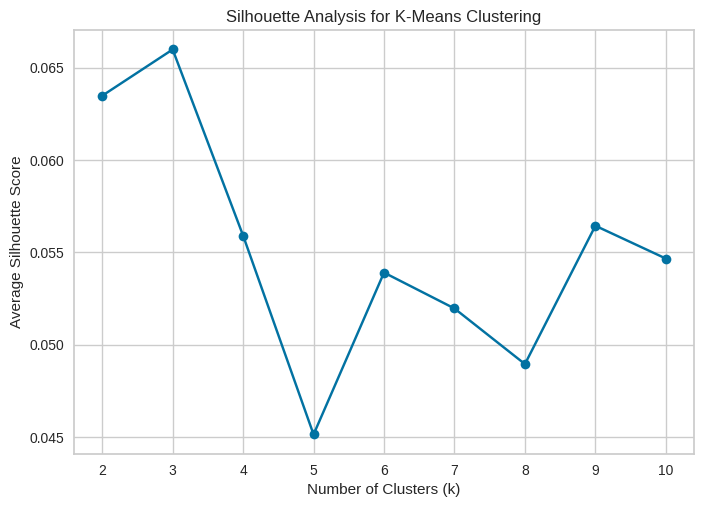

The highest average Silhouette score is 0.06597652180259345 with k=3.
The second highest average Silhouette score is 0.06347246695210883 with k=2.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Perform k-means clustering with different values of k
k_values = range(2, 11)
silhouette_avg_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_result = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, kmeans_result)
    silhouette_avg_values.append(silhouette_avg)

# Find the best number of clusters based on the highest average Silhouette score
best_k = k_values[np.argmax(silhouette_avg_values)]
best_score = max(silhouette_avg_values)

# Find the second highest average Silhouette score and its corresponding number of clusters
silhouette_avg_values_sorted = sorted(silhouette_avg_values, reverse=True)
second_best_score = silhouette_avg_values_sorted[1]
second_best_k = k_values[silhouette_avg_values.index(second_best_score)]

# Plot the silhouette scores for different values of k
plt.plot(k_values, silhouette_avg_values, marker='o')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.show()

print(f"The highest average Silhouette score is {best_score} with k={best_k}.")
print(f"The second highest average Silhouette score is {second_best_score} with k={second_best_k}.")

As shown, we determined that the optimal number of clusters (K) that maximizes the average Silhouette coefficient is 3, which will be our primary choice for K-means clustering.

# Elbow Method for Optimal Cluster Selection

The Elbow method helps determine the ideal number of clusters for analyzing our dataset. This approach involves calculating **inertia** (within-cluster sum of squares) for different numbers of clusters and plotting these values. Inertia measures how compact the clusters are, helping to assess how closely related students are within each group based on factors like study habits and school performance.

The **Elbow Point** is the spot on the plot where adding more clusters no longer significantly reduces inertia. This point represents the optimal number of clusters, balancing meaningful groupings with simplicity. By using the Elbow method, we can find the best cluster count for revealing patterns in student performance without over-complicating the model.


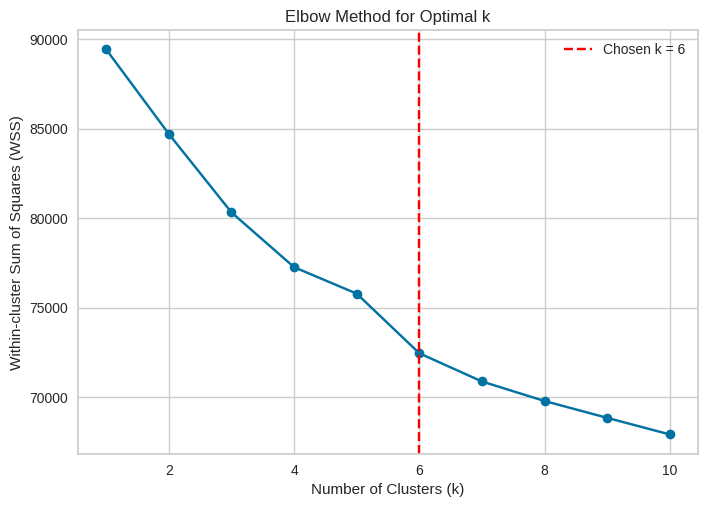

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
# Install kneed using pip
!pip install kneed
from kneed import KneeLocator # Now import kneed

X = df_scaled

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform k-means clustering for different values of k
wss_values = []
k_values = range(1, 11)

for k in k_values:
    kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=k, n_init=10))
    kmeans.fit(X_scaled)
    wss_values.append(kmeans.named_steps['kmeans'].inertia_)

# Plot the elbow method
plt.plot(k_values, wss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WSS)')
plt.title('Elbow Method for Optimal k')

# Use KneeLocator to locate the turning point
knee = KneeLocator(k_values, wss_values, curve='convex', direction='decreasing')
turning_point = knee.elbow

plt.axvline(x=turning_point, linestyle='--', color='red', label=f'Chosen k = {turning_point}')
plt.legend()
plt.show()

From the elbow plot, we identified an alternative configuration with a second-highest Silhouette score, making K=6 our third choice for K-means. This choice helps capture a wider range of cluster structures.

# K-means Clustering, Visualization, and Evaluation:
In this section, we’ll run K-means clustering with three chosen values of
K, visualize the clusters, and measure the quality of each setup. We’ll use WSS (Within-Cluster Sum of Squares), and the average silhouette score to evaluate each clustering.

# k=3

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(8953)

# Perform K-means clustering for K=3
kmeans = KMeans(n_clusters=3, random_state=8953, n_init=10)  # Set n_init explicitly
kmeans_result= kmeans.fit(df_scaled)

#Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result. labels_)

Cluster Centers:
[[-3.98169483e-01  3.30375902e-01 -1.53140871e-01  2.09230381e-02
   2.73746685e-01 -6.65476334e-02 -2.54943277e-01 -1.63959012e-01
  -1.87395572e-01  2.75125044e-01 -7.13943267e-02 -1.14430108e-01
   2.15318023e-01  3.68277303e-02 -1.63696019e-01 -3.23527843e-01
  -1.73644242e-01 -5.17387053e-02 -1.74230029e-01]
 [ 8.37957682e-03 -3.05464041e-02 -5.60992978e-02 -1.69930084e-02
  -5.03744305e-02  4.34423878e-02  2.18335031e-02 -2.07899137e-02
   3.49680019e-02 -1.90272547e-02  2.44487720e-03 -1.42735669e-02
   8.21448189e-03 -4.04805592e-02  2.08186370e-02  3.09092408e+00
   5.92016014e-02  3.20955359e-02 -7.38192580e-02]
 [ 3.96228864e-01 -3.23827769e-01  1.64810109e-01 -1.73567290e-02
  -2.63075290e-01  5.74242863e-02  2.50254077e-01  1.68233222e-01
   1.79989131e-01 -2.71013697e-01  7.08491321e-02  1.17363745e-01
  -2.16936203e-01 -2.83382150e-02  1.59262041e-01 -3.23527843e-01
   1.61172370e-01  4.49971062e-02  1.89598006e-01]]

Cluster Labels:
[2 2 2 ... 2 0 0]


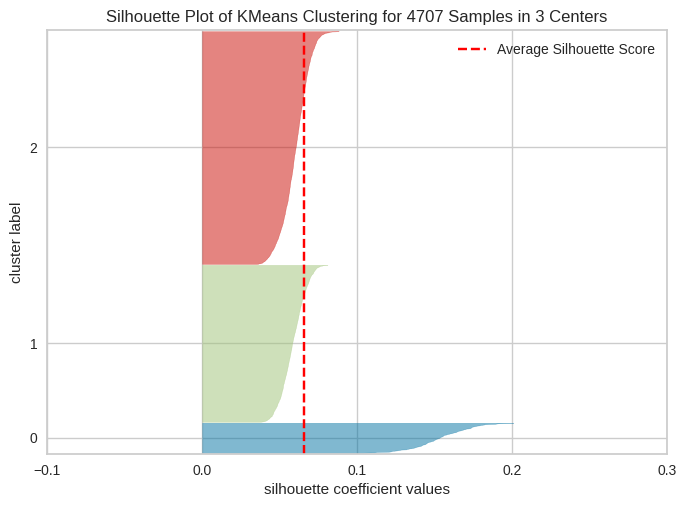

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 4707 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
!pip install yellowbrick > /dev/null
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(df_scaled)
visualizer.show()

The fact that most silhouette scores are positive indicates that the samples are generally well-matched to their clusters and are reasonably distant from neighboring clusters, suggesting that the clustering algorithm has effectively separated the data into distinct groups.

However, this is not a flawless solution. Specifically:

- Cluster 2 (red) has mostly positive scores, showing that its samples are relatively well-defined. Yet, some samples near zero indicate slight ambiguity at the cluster boundary.
- Cluster 1 (green) has many samples close to zero, which suggests moderate overlap with neighboring clusters and potential boundary ambiguity.
- Cluster 0 (blue) has several samples with scores near or below zero, indicating that some samples may be closer to other clusters than their own, highlighting overlap or misclassification.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Assuming X_scaled is your scaled data
X = df_scaled

# Perform k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(X, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

WSS: 80322.39337890927
Average Silhouette Score: 0.06597652180259345


# K=2

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(8953)

# Perform K-means clustering for K=8
kmeans = KMeans(n_clusters=8, random_state=8953, n_init=10)
kmeans_result = kmeans.fit(df_scaled)

# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

Cluster Centers:
[[ 2.60843958e-02  1.00680675e-03  6.86132757e-03  3.08736742e-02
   3.78975883e-02  1.98226264e-02  6.89627583e-02  4.40268534e-02
   2.78142483e-01  6.58003337e-03 -1.08626931e-02  6.69160859e-01
   6.61250262e-01  5.24220008e-02  6.55420513e-02 -3.23527843e-01
  -1.95679436e-02  2.34874748e-01  8.48760706e-01]
 [ 6.99787817e-02  2.42079503e-02  1.33640428e-02 -1.23052235e-01
  -4.17625154e-02 -6.93580890e-02  4.50017207e-02  7.58256556e-02
   2.78142483e-01  2.81424723e-02  5.74794653e-02 -3.07522019e-02
   5.54636272e-03  5.39482120e-02 -6.95387478e-02 -3.23527843e-01
  -3.82928011e-03 -2.33546436e+00  3.91134465e-02]
 [ 2.88245704e-02 -7.18615759e-02 -8.16204932e-02  8.12863346e-03
   1.27524722e-01 -2.09236350e-02  6.51278398e-02 -2.01822772e-02
   2.78142483e-01 -2.82194212e-02 -2.42616714e-02 -1.35925095e+00
   3.19510486e-02  1.16450203e-01 -5.35144934e-02 -3.23527843e-01
   3.25812331e-02  2.32433877e-01 -1.17818838e+00]
 [ 2.00070811e-02 -2.87174367e-02 -6.5

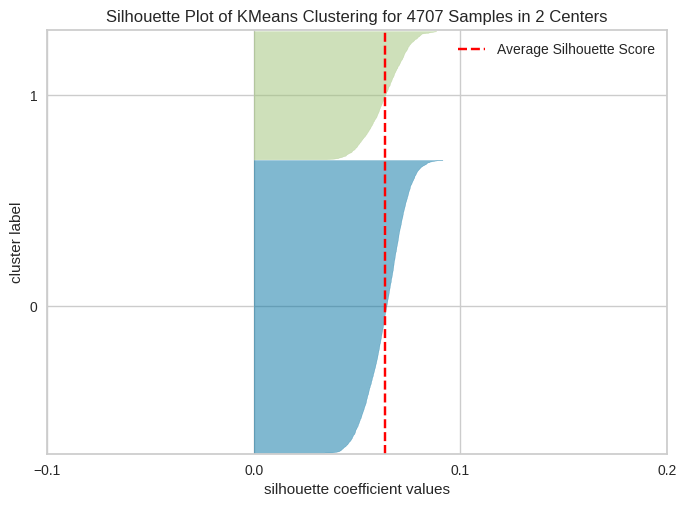

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 4707 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
!pip install yellowbrick > /dev/null
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(df_scaled)
visualizer.show()


The plot shows that most samples have positive silhouette scores, suggesting that the majority of data points are well-matched to their clusters and distinct from neighboring clusters. This indicates a reasonable clustering solution with decent separation between clusters.

However, this does not mean the clustering is perfect. There is still some overlap or ambiguity, especially for samples in cluster 0 that have silhouette scores close to zero or even negative. These scores suggest that some samples lie near the boundary between clusters or may be closer to the other cluster, indicating minor overlap.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Assuming X_scaled is your scaled data
X = df_scaled

# Perform k-means clustering with k=8
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(X, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

WSS: 84706.10487490016
Average Silhouette Score: 0.06347246695210883


# k=6

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(8953)

# Perform K-means clustering for K=6
kmeans = KMeans(n_clusters=6, random_state=8953, n_init=10)
kmeans_result= kmeans.fit(df_scaled)

#Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result. labels_)

Cluster Centers:
[[-3.02426231e-02  7.01953285e-02  7.60789014e-02  3.27670899e-02
   4.01097252e-02 -4.18466206e-02 -2.08924149e-02  3.55114633e-02
  -3.59527961e+00  5.51194725e-02 -2.52114711e-02  5.52919028e-02
  -1.09977038e-03  1.11447336e-02  4.74959273e-02 -4.06738377e-02
  -8.66727620e-02  9.03283880e-02 -2.07884570e-02]
 [ 1.74057734e-01 -9.31259108e-02 -9.22210558e-02  9.04890531e-02
   4.38530491e-02  9.07533939e-02  1.74785046e-01  7.69266112e-02
   2.78142483e-01 -7.02506271e-02  7.40829027e-01  6.65486321e-01
   6.59100373e-01  4.62925687e-02  1.90347084e-01 -3.23527843e-01
   1.34829473e-02  1.26371824e-02  2.27438689e-02]
 [-1.95182112e-01  7.09052940e-02  1.04249266e-01 -4.36045142e-02
  -7.53613035e-02 -7.64672583e-02 -1.94508433e-01 -3.97946803e-03
   2.78142483e-01  1.11202819e-01 -9.35756560e-01  6.75662572e-01
   6.61250262e-01 -5.13143248e-02 -1.63412914e-01 -3.23527843e-01
  -1.05193203e-01  1.53220925e-02 -7.66209069e-03]
 [ 2.00070811e-02 -2.87174367e-02 -6.5

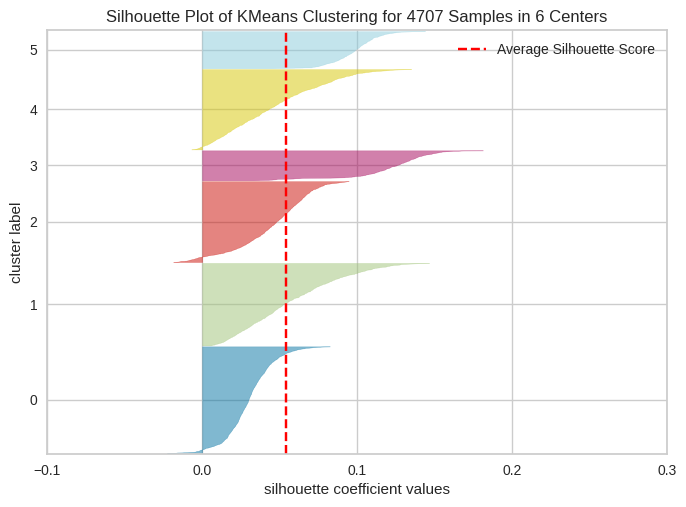

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 4707 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
!pip install yellowbrick > /dev/null
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, n_init=10, random_state=42)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(df_scaled)
visualizer.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Assuming X_scaled is your scaled data
X = df_scaled

# Perform k-means clustering with k=6
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(X, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

WSS: 72290.2315539881
Average Silhouette Score: 0.05390075714754793


# Assess the top clustering models:

<table style="width:70%">
  <tr>
    <th>K</th>
    <th>WSS</th>
    <th>Average Silhouette Score</th>
  </tr>
  <tr>
    <td>2</td>
    <td>84706.1049</td>
    <td>0.0635</td>
  </tr>
  <tr>
    <td>3</td>
    <td>80322.3934</td>
    <td>0.0660</td>
  </tr>
  <tr>
    <td>6</td>
    <td>72290.2316</td>
    <td>0.0539</td>
  </tr>
</table>


We determined that

K=3 is the best choice for our clustering model based on the metrics analyzed (WSS, average silhouette score, and K-Means visualization). This selection is due to K=3 achieving the highest silhouette score of 0.0660, indicating well-separated clusters, while also maintaining a favorable balance with a lower WSS compared to K=2 and K=6.

Furthermore, the silhouette plot for K-Means clustering with 3 centers was a key factor in our choice, as it demonstrated that
K=3 produces the most distinct and cohesive clusters in our dataset.